In [1]:
import pandas as pd
import numpy as np
import os
import glob
from scipy.stats import pearsonr
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
east_fordri = pd.read_csv("/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/ameriflux_sites_fordri_easternUS.csv", index_col=0)
east_fordri = east_fordri.drop(["Lat","Long"],axis = 1)

west_fordri = pd.read_csv("/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/ameriflux_sites_fordri_westernUS.csv", index_col=0)
west_fordri = west_fordri.drop(["Lat","Long"],axis = 1)

In [3]:
# west std br list
west_stdBR_dir = "/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/ForDRI_stdBR/" # west Bowen Ratio
west_stdBR_list = glob.glob(west_stdBR_dir+"*.csv")
west_stdBR_list.sort()
# east std br list
east_stdBR_dir = "/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/ForDRI_stdBR_easternUS/" # east Bowen Ratio
east_stdBR_list = glob.glob(east_stdBR_dir+"*.csv")
east_stdBR_list.sort()

## Annual Pearson correlation using the whole year

In [33]:
# west
site_list = []
r_list = []
p_list =[]
for stdBR in west_stdBR_list:
    fname = os.path.basename(stdBR)[:-4]
    df=pd.read_csv(stdBR,index_col=0) # get the std BR from 2003-2020
    df.loc[:,"ForDRI_Sample"] = west_fordri.loc[fname,:].values
    df.columns = ['ForDRI','stdBR']
    df_forcorr = df.dropna()
    corr = pearsonr(df_forcorr.loc[:, "ForDRI"].values, df_forcorr.loc[:, "stdBR"].values)
    site_list.append(fname)
    r_list.append(round(corr[0],4))
    p_list.append(np.format_float_scientific(corr[1],  precision=4))
    # output a table of the ForDRI and BR
    df.to_csv("/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/New_Results/ForDRI_BR_westernUS/"+fname+".csv")
pearsonr_df = pd.DataFrame()
pearsonr_df["Site"] = site_list
pearsonr_df["r"] = r_list
pearsonr_df["p-value"] = p_list
print(pearsonr_df)
pearsonr_df.to_csv("/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/New_Results/ForDRI_stdBR_PearsonR_westernUS.csv", index =None)

      Site       r     p-value
0   US-CMW  0.1167  4.2262e-04
1   US-GLE  0.3396  1.7869e-23
2   US-Me2  0.2686  1.4128e-15
3   US-Mpj  0.3158  1.7092e-16
4   US-NR1 -0.0147  6.9706e-01
5   US-SRM  0.0935  7.2171e-03
6   US-Ses -0.0504  2.3539e-01
7   US-Ton  0.2693  2.4879e-16
8   US-Vcm -0.3121  3.6057e-16
9   US-Vcp  0.1583  3.2962e-05
10  US-Whs  0.1478  2.5135e-04
11  US-Wjs  0.2652  5.8961e-12
12  US-Wrc -0.0944  2.8137e-02


In [36]:
# east
site_list = []
r_list = []
p_list =[]
for stdBR in east_stdBR_list:
    fname = os.path.basename(stdBR)[:-4]
    df=pd.read_csv(stdBR,index_col=0) # get the std BR from 2003-2020
    df.loc[:,"ForDRI_Sample"] = east_fordri.loc[fname,:].values
    df.columns = ['ForDRI','stdBR']
    df_forcorr = df.dropna()
    corr = pearsonr(df_forcorr.loc[:, "ForDRI"].values, df_forcorr.loc[:, "stdBR"].values)
    site_list.append(fname)
    r_list.append(round(corr[0],4))
    p_list.append(np.format_float_scientific(corr[1],  precision=4))
    # output a table of the ForDRI and BR
    df.to_csv("/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/New_Results/ForDRI_BR_easternUS/"+fname+".csv")
pearsonr_df = pd.DataFrame()
pearsonr_df["Site"] = site_list
pearsonr_df["r"] = r_list
pearsonr_df["p-value"] = p_list
print(pearsonr_df)
pearsonr_df.to_csv("/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/New_Results/ForDRI_stdBR_PearsonR_easternUS.csv", index =None)

     Site       r     p-value
0  US-Bar  0.0250  5.8022e-01
1  US-Ho1  0.0094  8.1462e-01
2  US-MMS  0.2870  8.9781e-18
3  US-MOz  0.3698  2.6309e-25
4  US-NC2  0.3751  7.7743e-26
5  US-Slt  0.1778   6.625e-05
6  US-Syv  0.0453  3.4345e-01
7  US-UMB  0.0887  3.6284e-02
8  US-WCr  0.2350  1.8431e-07


## Pearson Correlation plot in growing seasong by week

In [ ]:
br_fordri_west_dir = "/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/New_Results/ForDRI_BR_westernUS/"
br_fordri_west_list = glob.glob(br_fordri_west_dir+"*.csv")
br_fordri_west_list.sort()

br_fordri_east_dir = "/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/New_Results/ForDRI_BR_easternUS/"
br_fordri_east_list = glob.glob(br_fordri_east_dir+"*.csv")
br_fordri_east_list.sort()

In [ ]:
# west
pr_df_west = pd.DataFrame()
for f in br_fordri_west_list:
    fname = os.path.basename(f).split("-")[1][:3]
    print(fname)
    df = pd.read_csv(f,index_col=0)
    df = df.dropna()
    df_all_years = pd.DataFrame()
    if fname == "US-Whs":
        df = df.iloc[22:,:]
    df_corr_weekly = pd.DataFrame(columns = ["pearson_r", "p_value", "AmeriFlux"])
    df_all_year = pd.DataFrame()
    for week in range(18,43):
        df_corr = pd.DataFrame()
        for date in df.index:
            if str(week) == str(date)[-2:]:
                df_corr = df_corr.append(df.loc[df.index==date,:])
        if len(df_corr.loc[:, "ForDRI"].values) >= 3:
            corr = pearsonr(df_corr.loc[:, "ForDRI"].values, df_corr.loc[:, "stdBR"].values)
        df_corr_weekly.loc[week] = [corr[0],corr[1], fname]
        df_all_year = df_all_year.append(df_corr)
    overall_r = pearsonr(df_all_year.loc[:, "ForDRI"].values, df_all_year.loc[:, "stdBR"].values)
    print("Overall Pearson r and p value: ", overall_r[0],overall_r[1])
    df_corr_weekly_005 = df_corr_weekly.loc[df_corr_weekly["p_value"]<=0.05,:]
    print(df_corr_weekly_005)
    plt.figure(figsize = (10,5))
    plt.plot(df_corr_weekly.index.values,df_corr_weekly.pearson_r.values)
    plt.scatter(df_corr_weekly_005.index.values,df_corr_weekly_005.pearson_r.values,color="red",edgecolor="black",label = "P-value < 0.05")
    #plt.text(x=33, y=-0.9, s="Overall Pearson r and p value: %.2f,%.2f"%(overall_r[0],overall_r[1]))
    plt.ylim((-1,1))
    plt.ylabel("Pearson Correlation")
    plt.xlabel("Growing Season (Week)")
    plt.xticks(df_corr_weekly.index.values)
    plt.grid(axis="both")
    plt.legend()
    #plt.show()
    plt.savefig("/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/New_Results/ForDRI_BR_GrowingSeason_Pearsonr_westernUS/"+fname+".png", dpi=300)
    pr_df_west = pr_df_west.append(df_corr_weekly)
pr_df_west = pr_df_west.reset_index()

In [ ]:
# east
pr_df_east = pd.DataFrame()
for f in br_fordri_east_list:
    fname = os.path.basename(f).split("-")[1][:3]
    print(fname)
    df = pd.read_csv(f,index_col = 0)
    df = df.dropna()
    df_all_years = pd.DataFrame()
    
    df_corr_weekly = pd.DataFrame(columns = ["pearson_r", "p_value", "AmeriFlux"])
    df_all_year = pd.DataFrame()
    for week in range(18,43):
        df_corr = pd.DataFrame()
        for date in df.index:
            if str(week) == str(date)[-2:]:
                df_corr = df_corr.append(df.loc[df.index==date,:])
        if len(df_corr.loc[:, "ForDRI"].values) >= 3:
            corr = pearsonr(df_corr.loc[:, "ForDRI"].values, df_corr.loc[:, "stdBR"].values)
        df_corr_weekly.loc[week] = [corr[0],corr[1], fname]
        df_all_year = df_all_year.append(df_corr)
    overall_r = pearsonr(df_all_year.loc[:, "ForDRI"].values, df_all_year.loc[:, "stdBR"].values)
    print("Overall Pearson r and p value: ", overall_r[0],overall_r[1])
    df_corr_weekly_005 = df_corr_weekly.loc[df_corr_weekly["p_value"]<=0.05,:]
    print(df_corr_weekly_005)
    plt.figure(figsize = (10,5))
    plt.plot(df_corr_weekly.index.values,df_corr_weekly.pearson_r.values)
    plt.scatter(df_corr_weekly_005.index.values,df_corr_weekly_005.pearson_r.values,color="red",edgecolor="black",label = "P-value < 0.05")
    #plt.text(x=33, y=-0.9, s="Overall Pearson r and p value: %.2f,%.2f"%(overall_r[0],overall_r[1]))
    plt.ylim((-1,1))
    plt.ylabel("Pearson Correlation")
    plt.xlabel("Growing Season (Week)")
    plt.xticks(df_corr_weekly.index.values)
    plt.grid(axis="both")
    plt.legend()
    #plt.show()
    plt.savefig("/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/New_Results/ForDRI_BR_GrowingSeason_Pearsonr_easternUS/"+fname+".png", dpi=300)
    pr_df_east = pr_df_east.append(df_corr_weekly)
pr_df_east = pr_df_east.reset_index()

## Pearson Correlation boxplot in growing seasong by week

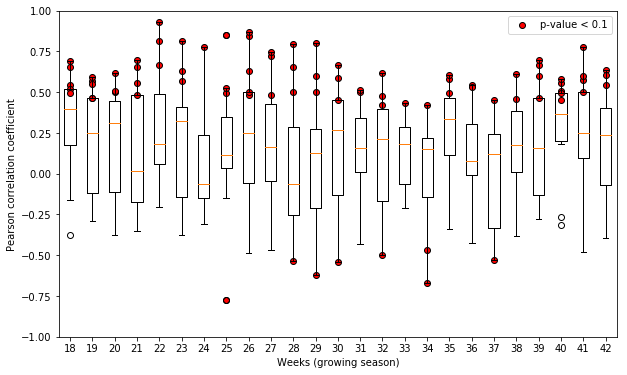

In [43]:
# west
dicts = {}
pr_df_west_region = pr_df_west.copy()
for week in range(18,43):
    dicts[week] = pr_df_west_region.loc[pr_df_west_region["index"] == week, "pearson_r"].values
fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(dicts.values())
pr_df_west_region_01 = pr_df_west_region.loc[pr_df_west_region["p_value"]<=0.1,:]
ax.scatter(pr_df_west_region_01["index"].values-17, pr_df_west_region_01["pearson_r"].values,color="red",edgecolor="black",label = "p-value < 0.1")
ax.set_xlabel("Weeks (growing season)")
ax.set_ylabel("Pearson correlation coefficient")
ax.set_xticklabels(dicts.keys())
ax.set_ylim((-1,1))
plt.legend()
#plt.show()
plt.savefig("/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/New_Results/ForDRI_BR_GrowingSeason_Pearsonr_westernUS/Overall.png",dpi=300)

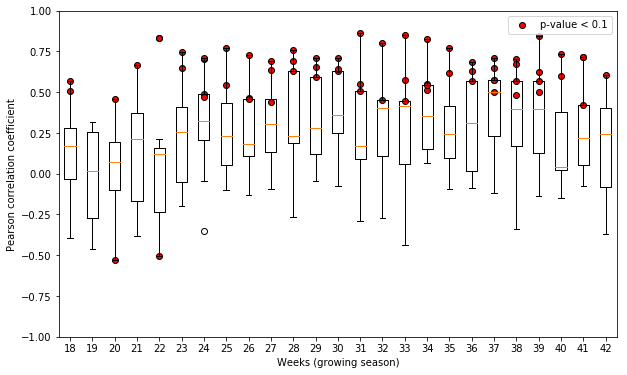

In [45]:
# east
dicts = {}
pr_df_east_region = pr_df_east.copy()
for week in range(18,43):
    dicts[week] = pr_df_east_region.loc[pr_df_east_region["index"] == week, "pearson_r"].values
fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(dicts.values())
pr_df_east_region_01 = pr_df_east_region.loc[pr_df_east_region["p_value"]<=0.1,:]
ax.scatter(pr_df_east_region_01["index"].values-17, pr_df_east_region_01["pearson_r"].values,color="red",edgecolor="black",label = "p-value < 0.1")
ax.set_xlabel("Weeks (growing season)")
ax.set_ylabel("Pearson correlation coefficient")
ax.set_xticklabels(dicts.keys())
ax.set_ylim((-1,1))
plt.legend()
#plt.show()
plt.savefig("/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/New_Results/ForDRI_BR_GrowingSeason_Pearsonr_easternUS/Overall.png",dpi=300)

## Time-series plots of ForDRI and stdBR, growing seasons in shadow

In [6]:
#growing season (tentative)
gs_weeks = np.array([])
for y in range(2003,2021):
    gs_weeks = np.append(gs_weeks,np.arange(18,43,1)+(y-2003)*52)

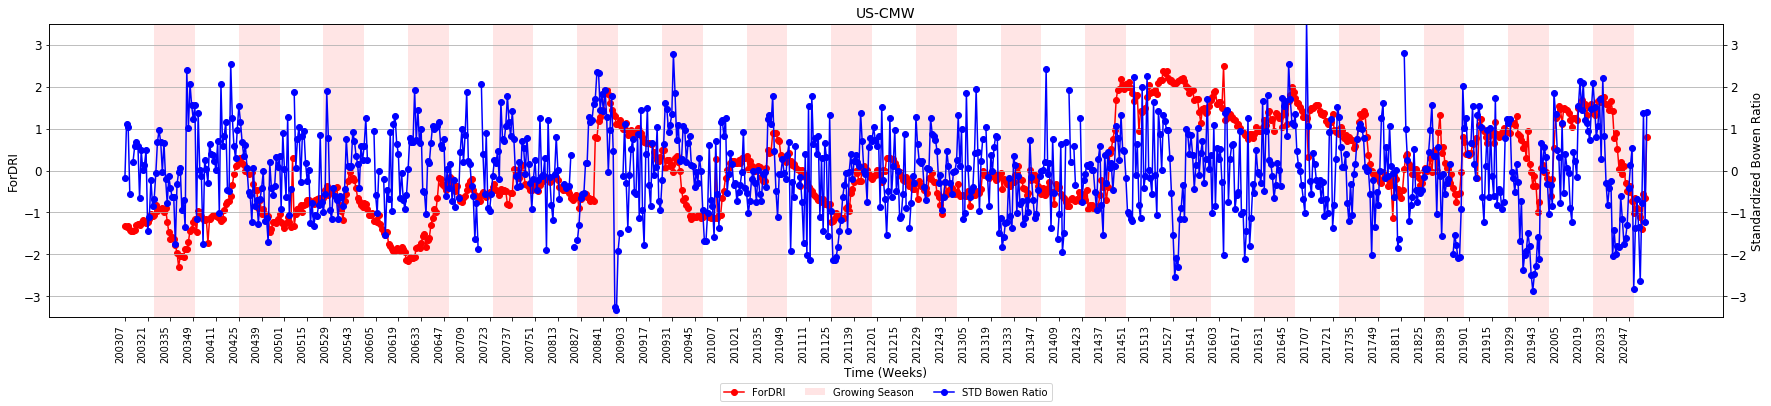

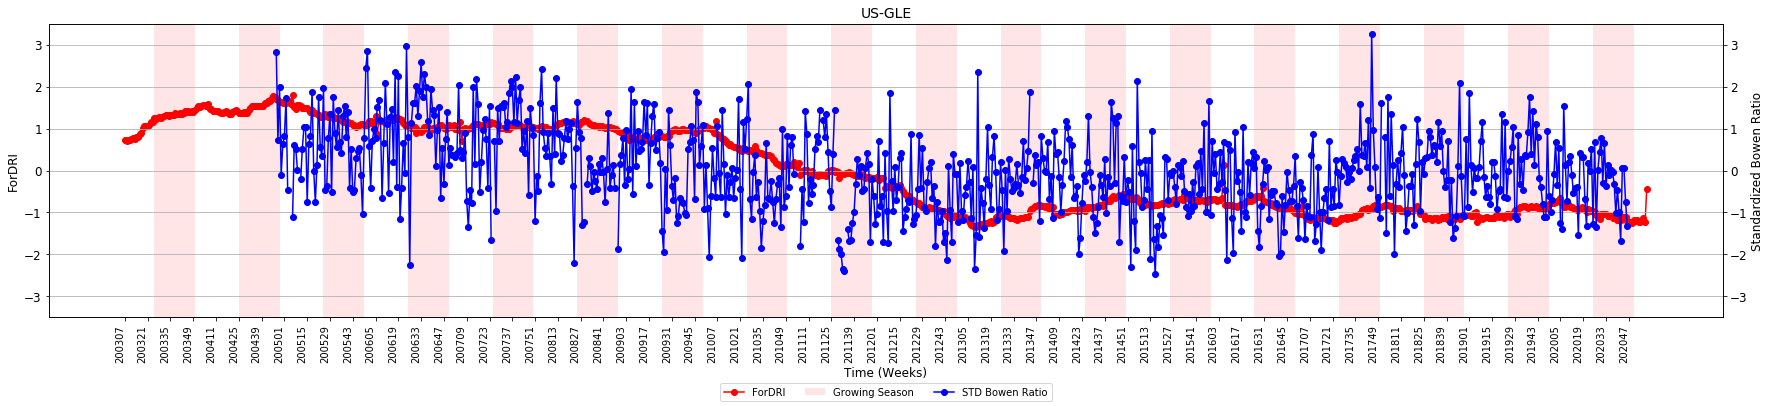

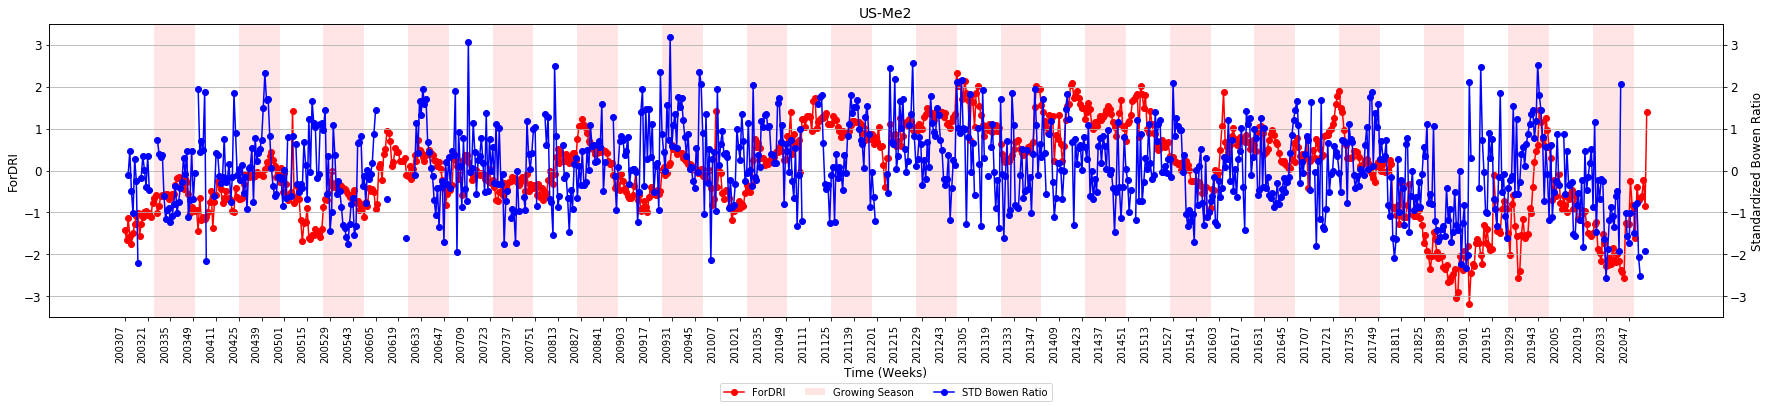

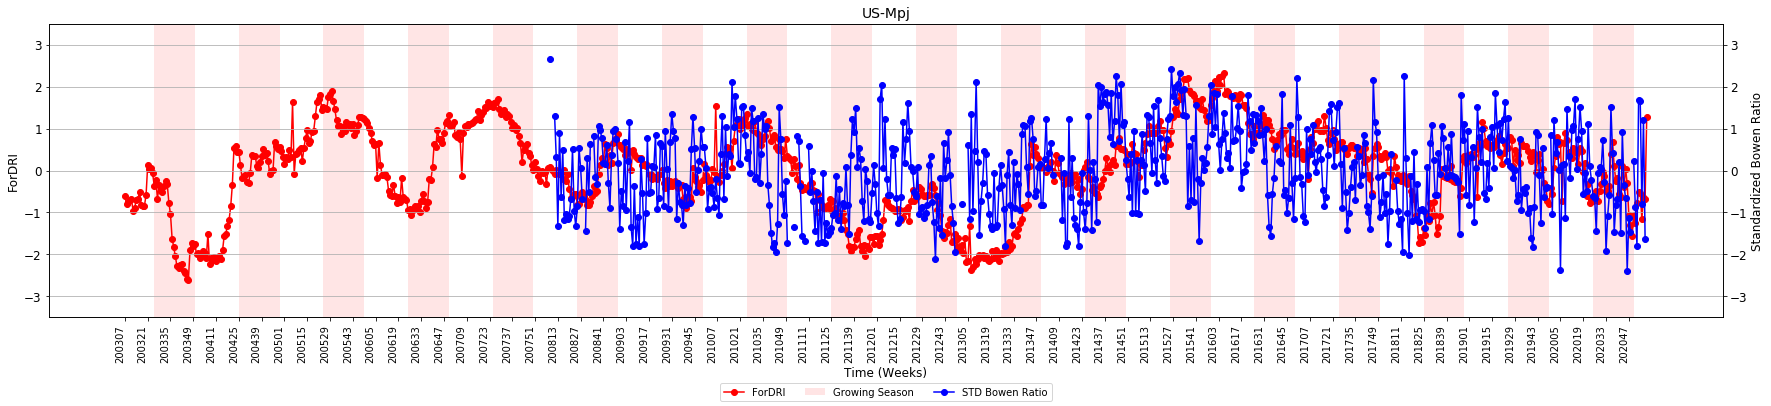

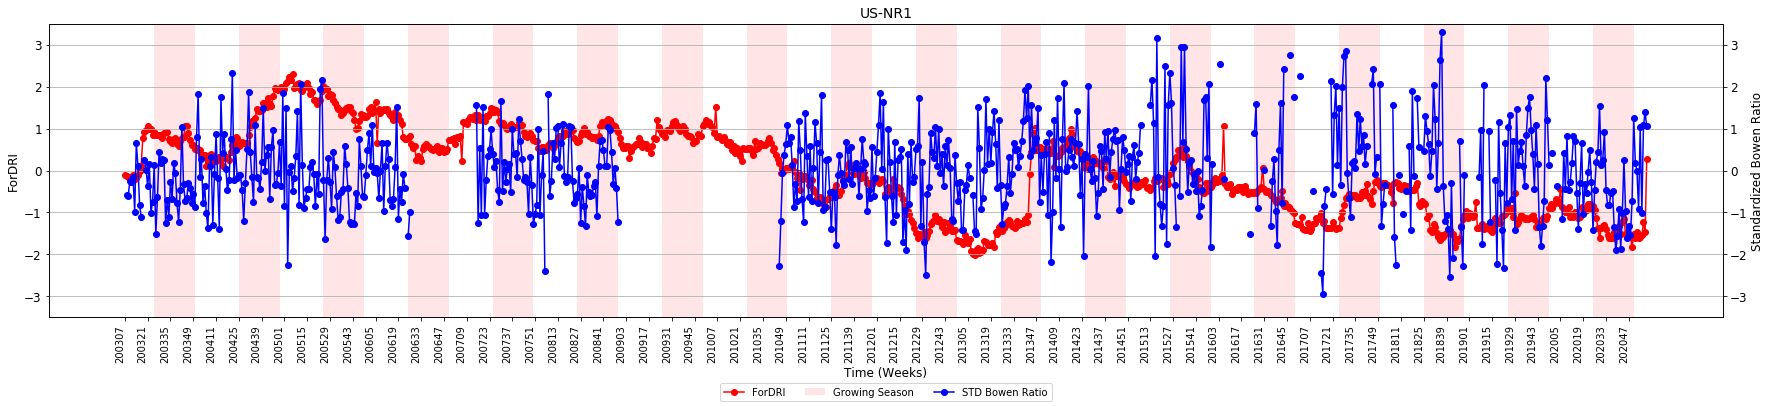

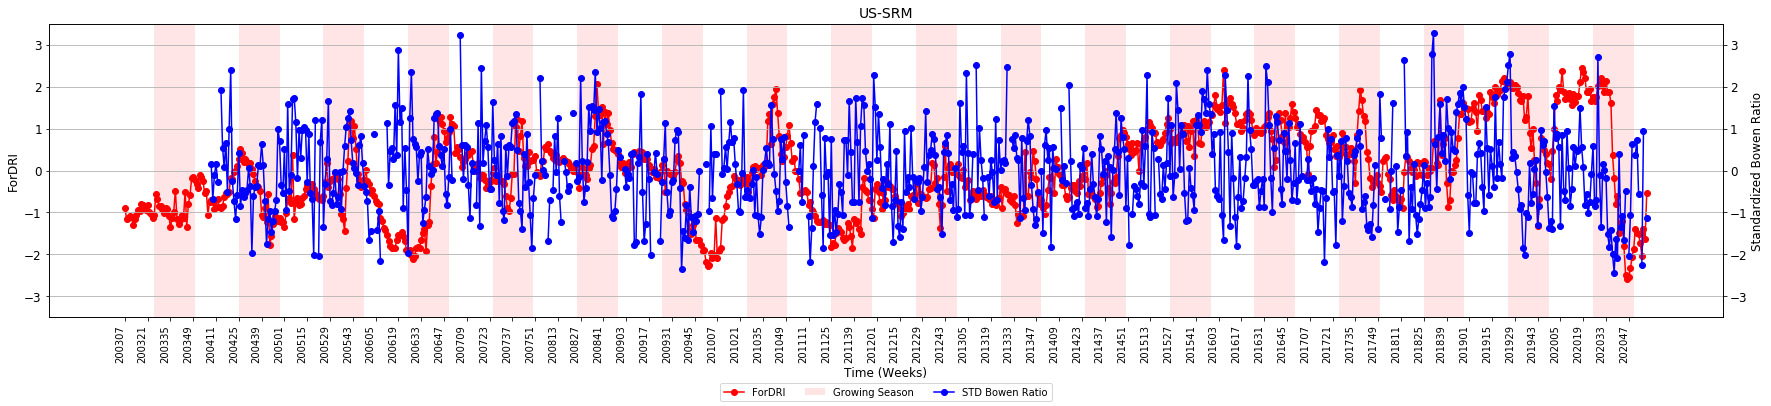

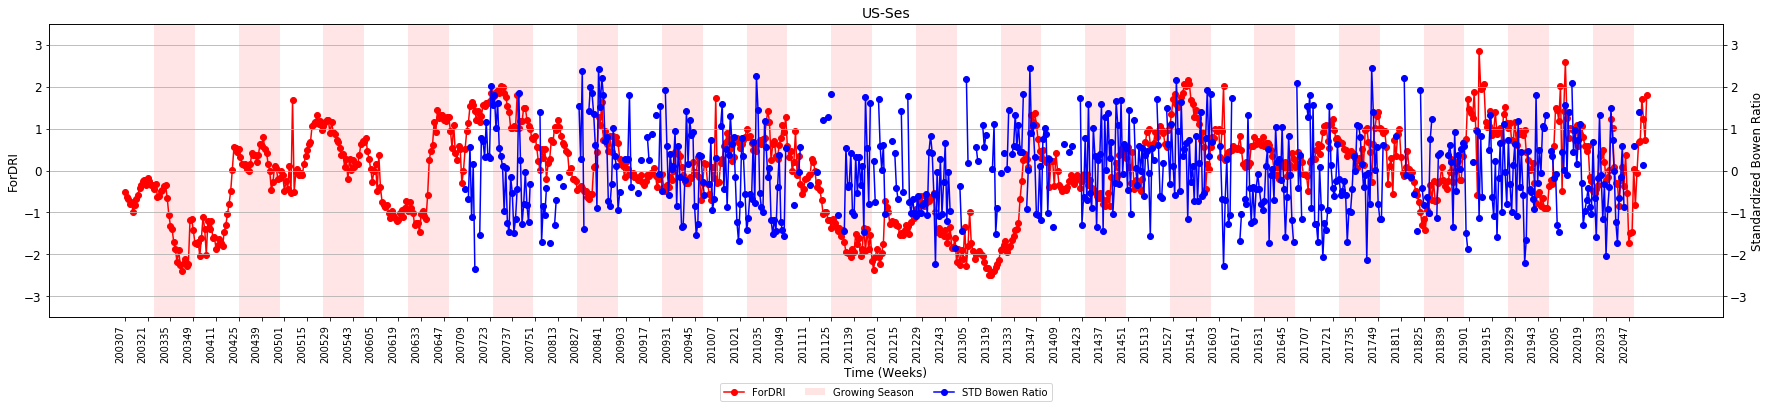

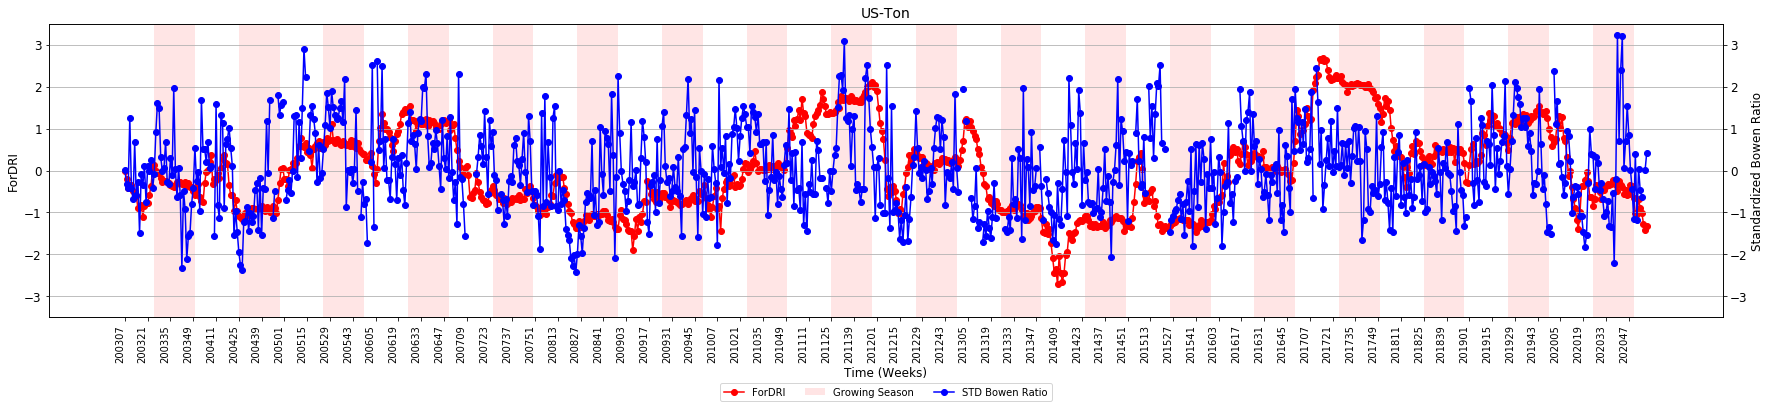

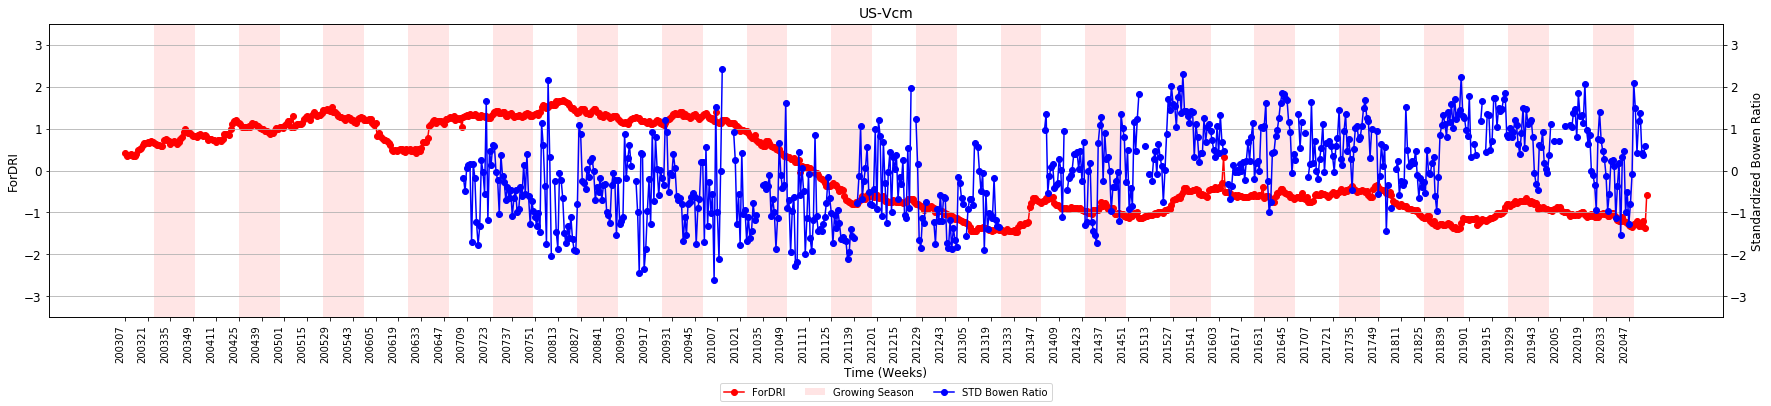

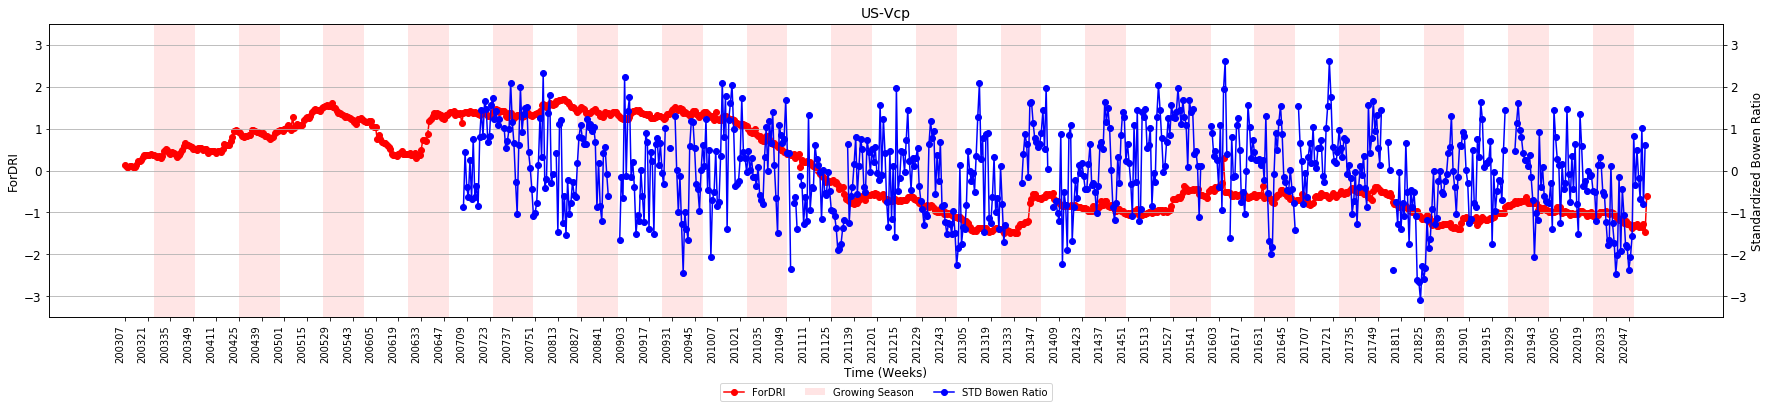

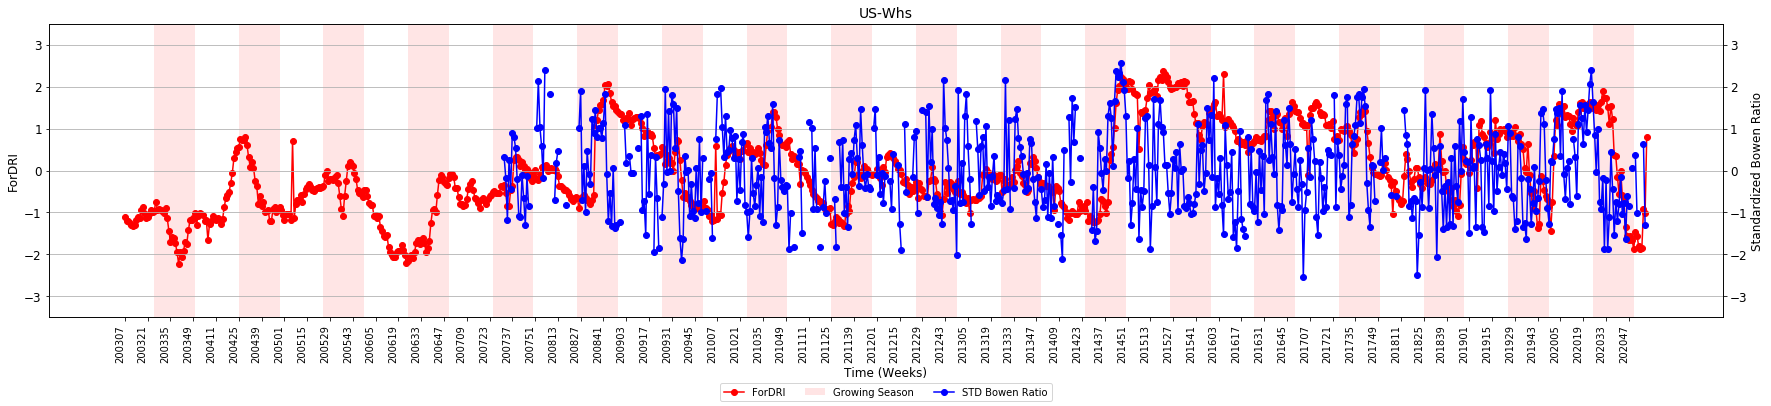

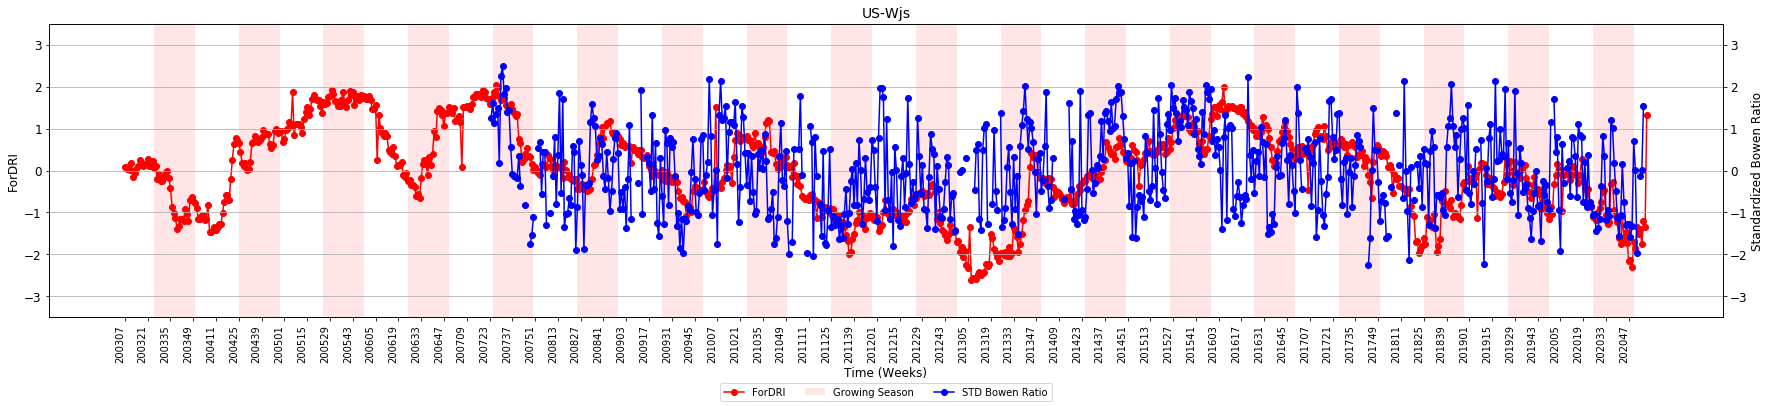

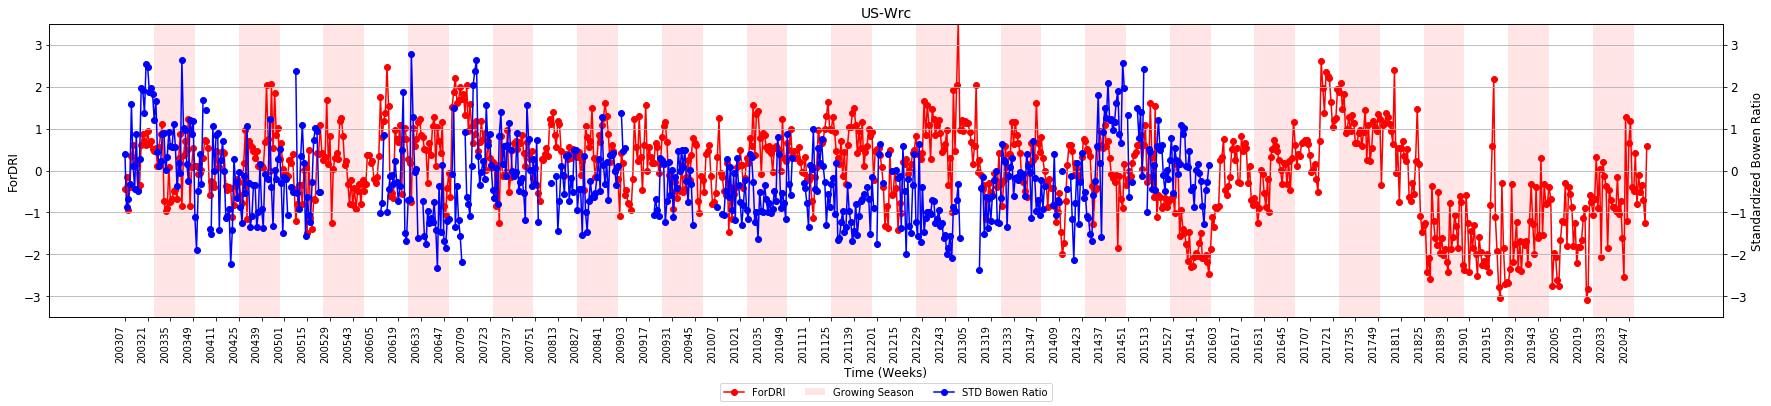

In [20]:
# west
corr_list = []
for f in br_fordri_west_list:
    fname = os.path.basename(f)[:-4]
    df = pd.read_csv(f,index_col=0)
    fig = plt.figure(figsize=(30,6))
    ax1 = fig.add_subplot(111)
    ax1.plot(np.arange(0,936,1), df["ForDRI"].values, marker = 'o',color="red", label="ForDRI")
    #ax1.xaxis.set_major_locator(mdates.DayLocator(interval=30))
    fig.autofmt_xdate(rotation=90)
    ax1.set_ylim(-3.5,3.5)
    ax1.set_ylabel("ForDRI",fontsize=12)
    ax1.set_xlabel("Time (Weeks)", fontsize=12)
    plt.yticks(fontsize=12)
    ax1.set_title(fname,fontsize=14)
    for y in range(2003,2021):
        gs_weeks = np.array([18,43])+(y-2003)*52
        ax1.fill_between(gs_weeks,-3.5, 3.5,facecolor='red', alpha=0.1)
    ax1.fill_between([0,0],-3.5, 3.5,facecolor='red', alpha=0.1, label = 'Growing Season')
    ax2 = ax1.twinx()
    ax2.plot(np.arange(0,936,1), df["stdBR"].values, marker = 'o', color="blue",label="STD Bowen Ratio")
    ax2.set_ylim(-3.5,3.5)
    #ax2.tick_params(fontsize=12)
    ax2.set_ylabel("Standardized Bowen Ratio",fontsize=12)
    #ax1.text(25,-2.5,"r = {0:.2f}, p = {1:.2e}".format(*[corr[0],corr[1]]),fontsize=12, horizontalalignment='right', verticalalignment='bottom')
    #df_growing_season = df.loc[df["Time"]==str(y)+"18":df["Time"]==str(y)+"40",:]
    corr_list.append(corr[0])
    plt.grid(axis="both")
    plt.xticks(np.arange(0,936,14),df.index.values[6::14])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    fig.legend(ncol=3, loc='lower center')
    fig.savefig("/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/New_Results/ForDRI_stdBR_Time_Series_westernUS/"+fname+'.png', ppi = 500)
    #fig.show()

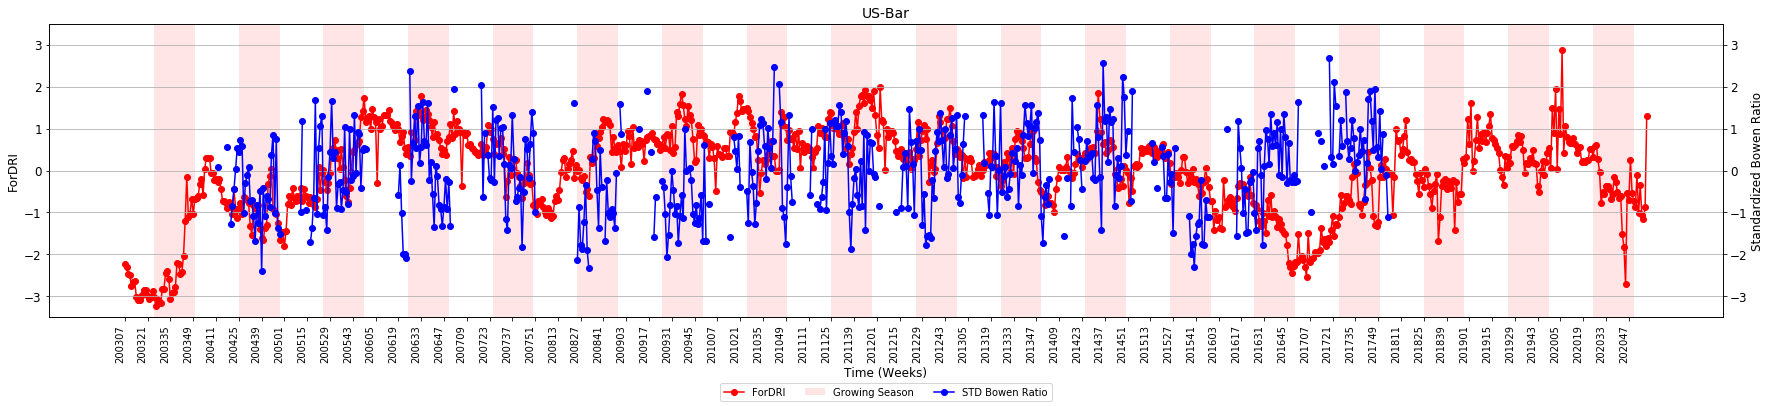

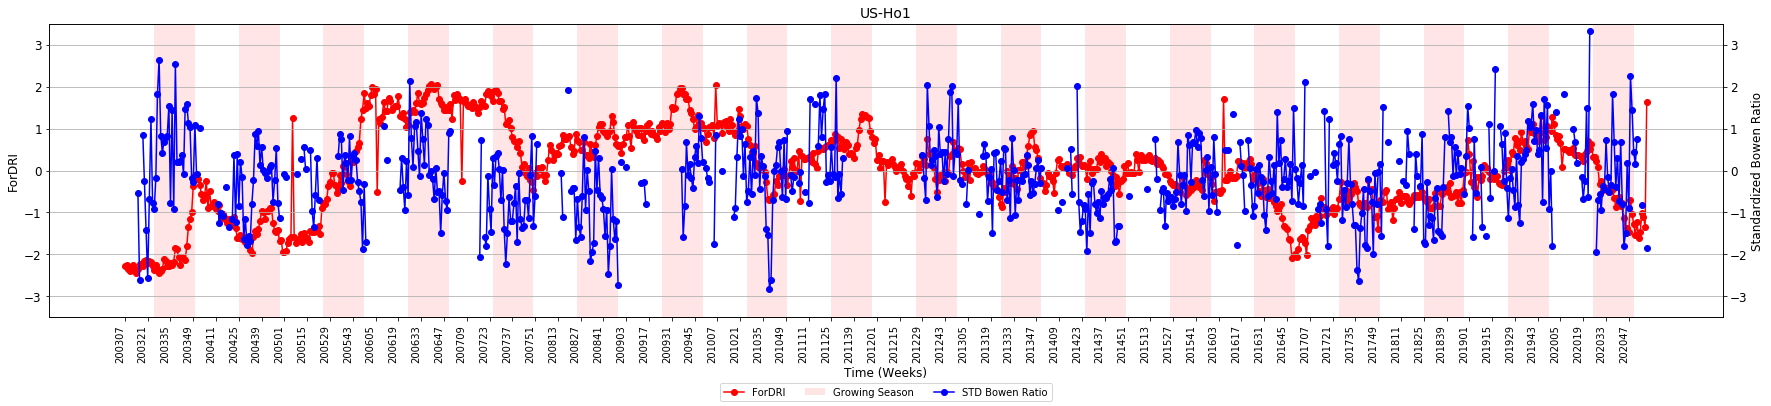

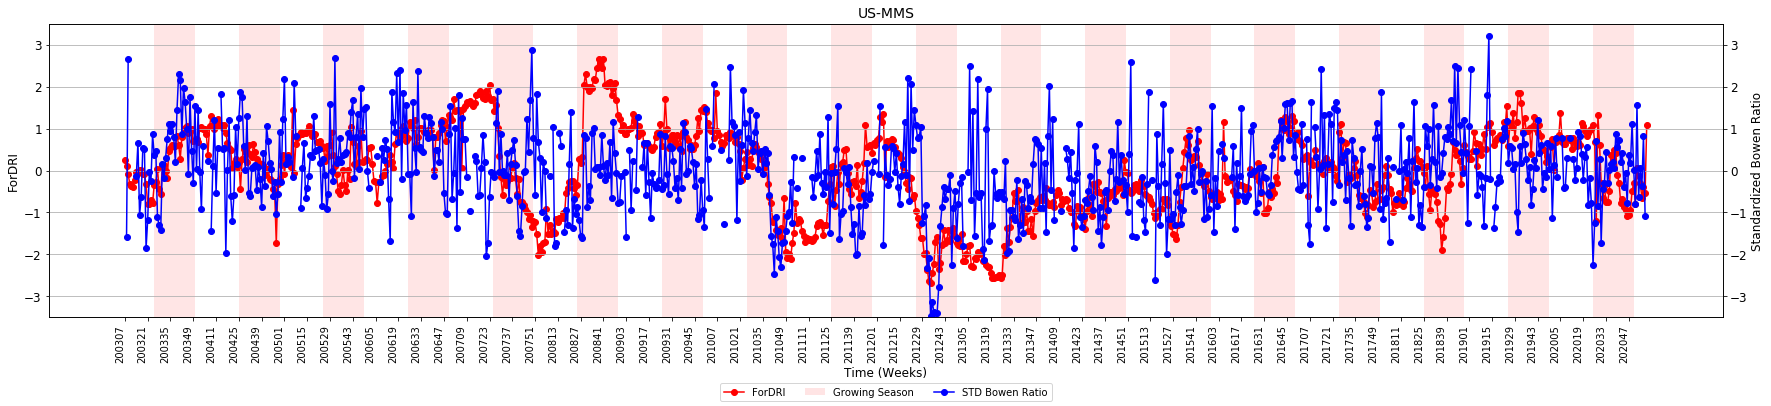

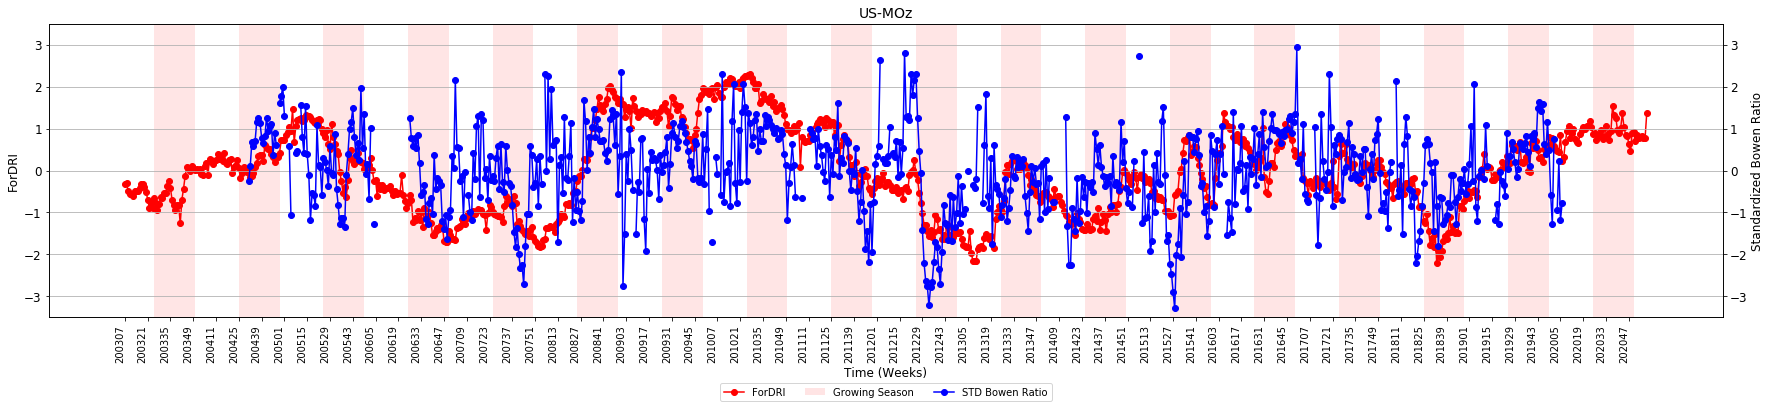

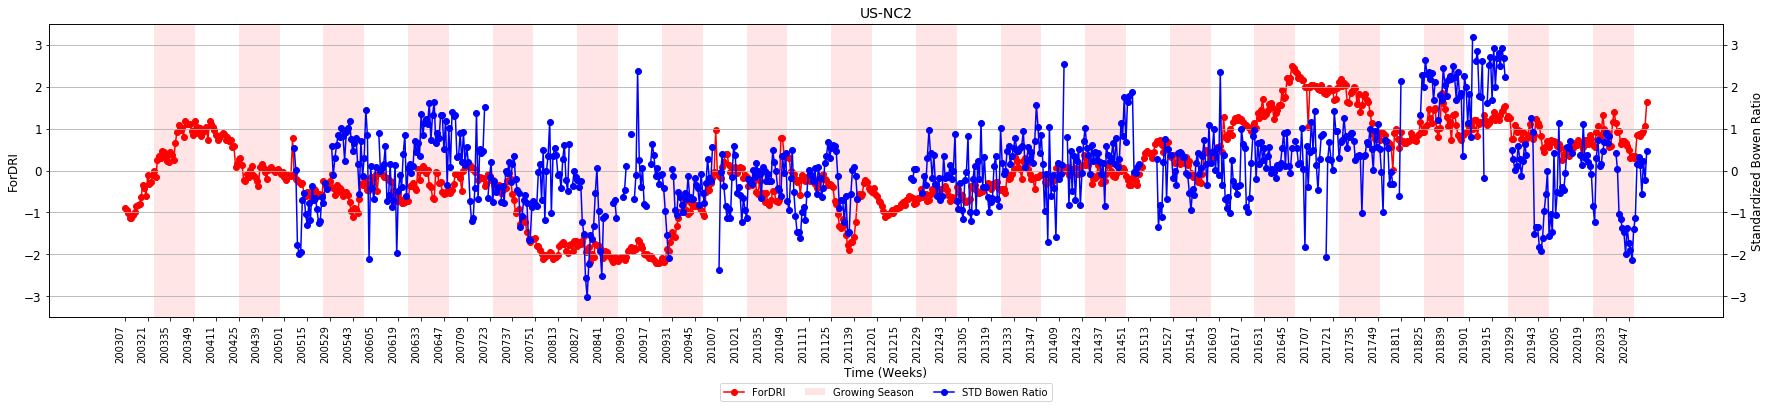

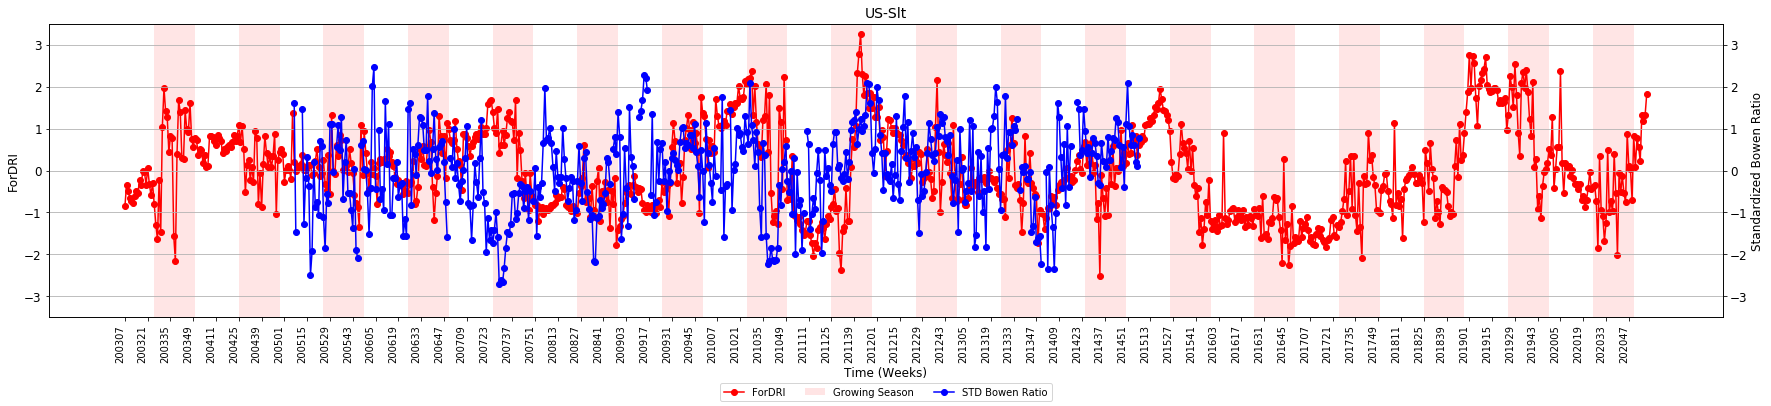

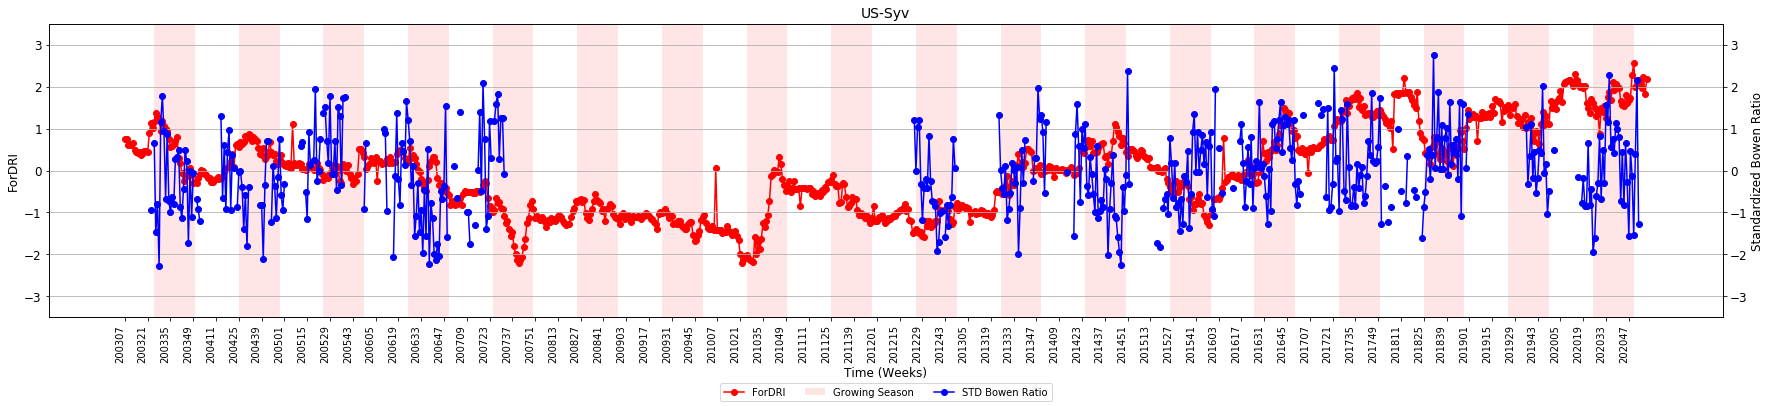

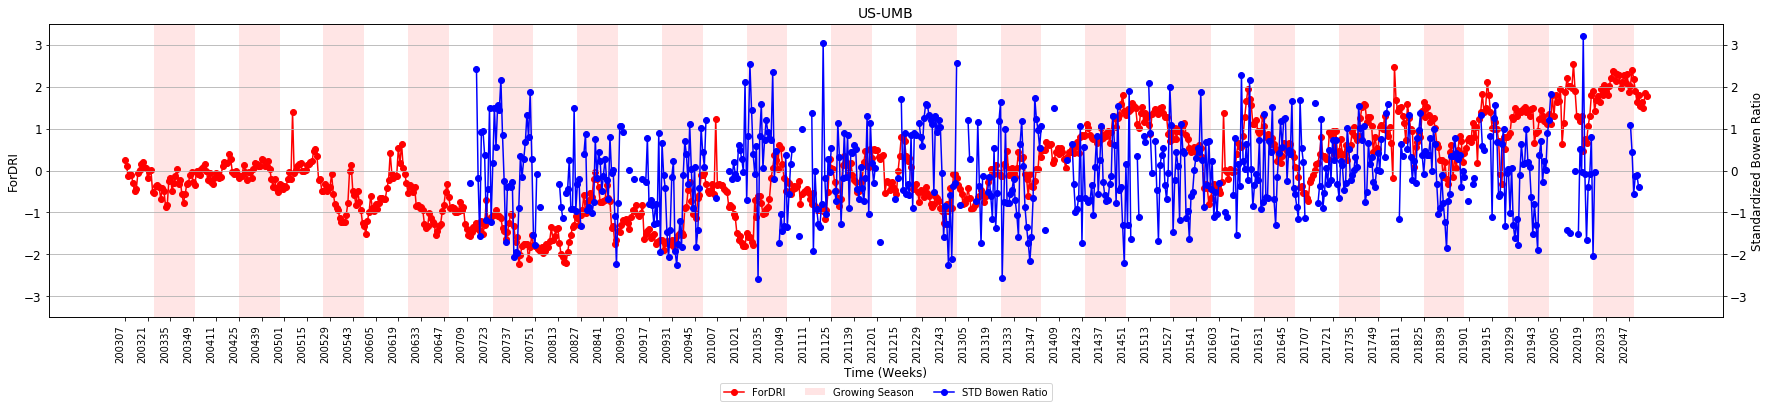

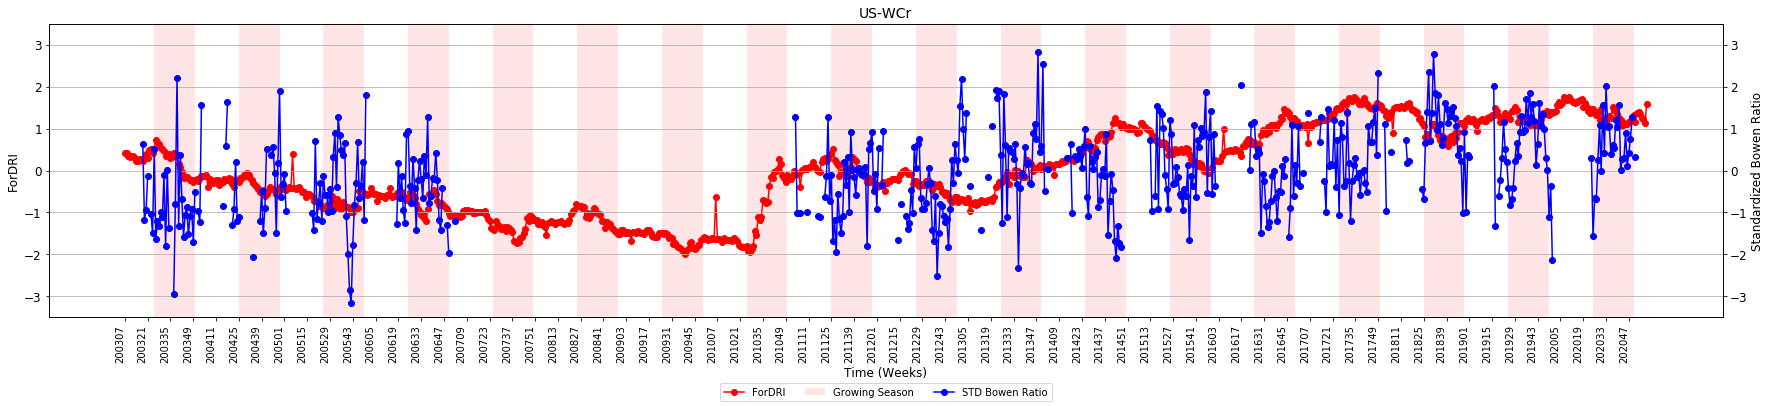

In [22]:
# east
corr_list = []
for f in br_fordri_east_list:
    fname = os.path.basename(f)[:-4]
    df = pd.read_csv(f,index_col=0)
    fig = plt.figure(figsize=(30,6))
    ax1 = fig.add_subplot(111)
    ax1.plot(np.arange(0,936,1), df["ForDRI"].values, marker = 'o',color="red", label="ForDRI")
    #ax1.xaxis.set_major_locator(mdates.DayLocator(interval=30))
    fig.autofmt_xdate(rotation=90)
    ax1.set_ylim(-3.5,3.5)
    ax1.set_ylabel("ForDRI",fontsize=12)
    ax1.set_xlabel("Time (Weeks)", fontsize=12)
    plt.yticks(fontsize=12)
    ax1.set_title(fname,fontsize=14)
    for y in range(2003,2021):
        gs_weeks = np.array([18,43])+(y-2003)*52
        ax1.fill_between(gs_weeks,-3.5, 3.5,facecolor='red', alpha=0.1)
    ax1.fill_between([0,0],-3.5, 3.5,facecolor='red', alpha=0.1, label = 'Growing Season')
    ax2 = ax1.twinx()
    ax2.plot(np.arange(0,936,1), df["stdBR"].values, marker = 'o', color="blue",label="STD Bowen Ratio")
    ax2.set_ylim(-3.5,3.5)
    #ax2.tick_params(fontsize=12)
    ax2.set_ylabel("Standardized Bowen Ratio",fontsize=12)
    #ax1.text(25,-2.5,"r = {0:.2f}, p = {1:.2e}".format(*[corr[0],corr[1]]),fontsize=12, horizontalalignment='right', verticalalignment='bottom')
    #df_growing_season = df.loc[df["Time"]==str(y)+"18":df["Time"]==str(y)+"40",:]
    corr_list.append(corr[0])
    plt.grid(axis="both")
    plt.xticks(np.arange(0,936,14),df.index.values[6::14])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    fig.legend(ncol=3, loc='lower center')
    fig.savefig("/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/New_Results/ForDRI_stdBR_Time_Series_easternUS/"+fname+'.png', ppi = 500)
    #fig.show()